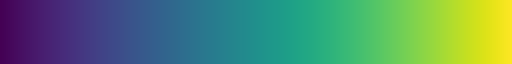

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.color_palette("viridis", as_cmap=True)


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

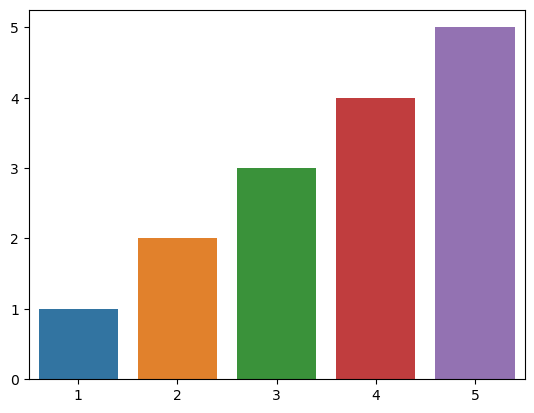

In [13]:
y = np.array([1, 2, 3, 4, 5])
x = np.array([1, 2, 3, 4, 5])
sns.barplot(x, y)